In [145]:
# -*- coding: utf-8 -*-
"""
Created on Sun Jan 30 18:18:21 2022
@author: Semiu
"""
#########################################################
#                                                       #
#       Assignment 1: GENETIC ALGORITHM APPLIED TO      #
#       OVERLAY NETWORK OPTIMIZATION                    #    
#                                                       #
# 		Author: Semiu Akanmu                            #
#                                                       #
#       Student ID:  1236414                            #
#                                                       #
#		Please DO NOT publish your implemented code     #
#       for example on GitHub							#
#########################################################

'\nCreated on Sun Jan 30 18:18:21 2022\n@author: Semiu\n'

In [146]:
#Import the required modules
import random
import numpy as np
import matplotlib.pyplot as plt

In [147]:
#Parameters
popSize = 100 #population size
chromLength = 300 #Length of the Chromosome
crossover_rate = 0.7  #Initialized value for the cross over rate
mutation_rate = 0.008 #Initialized value for the mutation rate
iteration_max = 1000 #Maximum number of iteration
fitness = np.empty([popSize])  #An empty array to put fitness value of each chromosome/node link                             
costVector = np.empty([chromLength]) #An empty array to hold the associated cost for every node link

In [148]:
#loadNetwork function - this loads the cost of two linked nodes, as provided in the network.txt file.
#Returns the cost function of each 
def loadNetwork():
    cost_list = [x.split(',')[2].replace('\n','') for x in open('network.txt').readlines()]
    chrom = 0
    while (chrom < chromLength-1):
        for val in cost_list:
            costVector[chrom] = float(val)
            chrom += 1
    return costVector

In [149]:
#Calling the function so that the costVector array is populated with the cost data from the text file.
loadNetwork()

array([ 85.19, 105.98, 100.36,  88.74, 103.73, 124.08,  73.71,  97.31,
       105.42, 121.85, 126.72,  91.19,  95.76,  64.77,  92.94, 101.35,
        95.67,  90.49, 138.14,  96.58,  79.64,  83.33,  97.88, 103.  ,
       126.33,  81.85, 130.04, 128.43, 117.44,  86.59, 102.51,  77.74,
        83.89, 106.77,  80.03,  95.36,  93.58, 117.99, 100.36,  61.39,
       103.83, 121.35,  92.44, 103.81,  90.54,  96.97,  94.55, 129.25,
        74.66,  89.23, 104.  , 129.8 ,  84.32, 107.04,  94.3 , 124.78,
       104.05, 112.97, 112.21, 119.26,  91.7 , 116.16, 104.54,  84.79,
        97.58, 109.55,  96.85, 109.65,  90.64,  93.4 ,  88.14,  92.29,
       104.98, 121.97, 100.32,  84.5 ,  92.04, 121.04,  72.56,  83.39,
        99.22,  96.47, 103.59,  77.41, 105.66,  84.97, 114.56, 123.7 ,
        91.1 , 141.83, 107.43,  89.8 ,  90.28, 104.03,  82.54, 115.58,
       103.53, 108.95, 107.65,  92.03, 117.63, 118.7 ,  73.23,  98.1 ,
        97.58, 106.36,  90.21, 111.65, 103.97,  75.46, 110.11, 116.84,
      

In [150]:
#Create an empty chromosome string for the intial population of chromosomes
chromosome_string = np.empty([chromLength])

#Initialize the empty array that will hold the chromosomes of n population. This needed to be of the same length 
#as the chromLength used in the evaluateFitness method
chromosome = np.empty((0,len(chromosome_string)))

#Generate 0s and 1s randomly to fill the chromosome_string
for i in range(chromLength):
    rand_int = np.random.randint(0,2)
    chromosome_string[i] = rand_int
    
# shuffle the elements in the initial solution (vector)
# shuffle n times, where n is the no. of the desired chromosome population
for i in range(popSize):
    random.shuffle(chromosome_string)
    chromosome = np.vstack((chromosome,chromosome_string)) #initial population of chromosomes

In [151]:
#Evaluate fitness function (Cost maximization for the node in the overlay network) of the chromosomes to find 
#the best and avarage fitness value among the population of chromosomes
def evaluateFitness(chromosome,best):
    costFullyConnectedNetwork=30098.059999999983
    fitness_total=0.0;
    fitness_average=0.0;
    
    for i in range(0,popSize):
        fitness[i]=0

    for i in range(0,popSize):
        cost=0
        for j in range(0,chromLength):        
            if chromosome[i,j]==1:
                cost=cost+costVector[j]
        fitness[i]=1-(cost/costFullyConnectedNetwork)
        fitness_total=fitness_total+fitness[i]
    fitness_average=fitness_total/popSize

    for i in range(0,popSize):
        if fitness[i]>=best:
            best = fitness[i]
            
    return best, fitness_average

In [152]:
#This function is part of the evaluateFitness function, but isolated to return only the fitness list.
#The fitness values in the list correspond to the fitness of each chromosome in the population
def getFitnessList(chromosome):
    costFullyConnectedNetwork=30098.059999999983
    
    for i in range(0,popSize):
        fitness[i]=0

    for i in range(0,popSize):
        cost=0
        for j in range(0,chromLength):        
            if chromosome[i,j]==1:
                cost=cost+costVector[j]
        fitness[i]=1-(cost/costFullyConnectedNetwork)
    return fitness

In [153]:
#This function selects the teo best fitted parents from the initial population using the tournament selection method
def select_parents_ts(chromosome):
  
    # make an empty array to place the selected parents
    parents = np.empty((0,np.size(chromosome,1)))
    
    for i in range(2): # do the process twice to get 2 parents
        
        #Get three random integers
        indices = np.random.choice(popSize,3,replace=False)
        
        #Get the 3 possible parents for selection randonly based on random integers generated
        posb_parent_1 = chromosome[indices[0]]
        posb_parent_2 = chromosome[indices[1]]
        posb_parent_3 = chromosome[indices[2]]
        
        #Get the fitness value of the respective parents randomly selected 
        fitness_list = getFitnessList(chromosome)
        
        fitness_parent_1 = fitness_list[indices[0]] # fitness value for possible parent 1
        fitness_parent_2 = fitness_list[indices[1]] # fitness value for possible parent 2
        fitness_parent_3 = fitness_list[indices[2]] # fitness value for possible parent 3
        
        
        #Find which parent is the best among the three using max function, since it is a maximization problem
        best_fitness_parent = max(fitness_parent_1, fitness_parent_2, fitness_parent_3)
        
        if best_fitness_parent == fitness_parent_1:
            selected_parent = posb_parent_1
        elif best_fitness_parent == fitness_parent_2:
            selected_parent = posb_parent_2
        else:
            selected_parent = posb_parent_3
        
        #Put the selected parent in the empty array
        parents = np.vstack((parents,selected_parent))
        
    selected_parent_1 = parents[0,:] # parent_1, first element in the array
    selected_parent_2 = parents[1,:] # parent_2, second element in the array
    
    return selected_parent_1,selected_parent_2 # the defined function will return 2 arrays

In [154]:
# Crossover operation between the 2 parents to create 2 children
# Function inputs are the selected parents and the crossover rate
def crossover(parent_1, parent_2, crossover_rate):
    #An empty array for each child from the parent
    child_1 = np.empty((0,len(parent_1)))
    child_2 = np.empty((0,len(parent_2)))
    
    #A random number to check if crossover will take place or not
    rand_num_to_crsvr_or_not = np.random.rand()
    
    if rand_num_to_crsvr_or_not < crossover_rate:
        index_1 = np.random.randint(0,len(parent_1))
        index_2 = np.random.randint(0,len(parent_2))
        
        # get different indices to make sure at least one is crossovered
        while index_1 == index_2:
            index_2 = np.random.randint(0,len(parent_1)+1)
        
        # IF THE INDEX FROM PARENT_1 COMES BEFORE PARENT_2
        # e.g. parent_1 = 0,1,>>1<<,1,0,0,1,0 --> index = 2
        # e.g. parent_2 = 0,0,1,0,0,1,>>1<<,1 --> index = 6
        if index_1 < index_2:
            
            ### FOR PARENT_1 ###
            # first_seg_parent_1 -->
            # for parent_1: the genes from the beginning of parent_1 to the
                    # beginning of the middle segment of parent_1
            first_seg_parent_1 = parent_1[:index_1]
            
            # middle segment; where the crossover will happen
            # for parent_1: the genes from the index chosen for parent_1 to
                    # the index chosen for parent_2
            mid_seg_parent_1 = parent_1[index_1:index_2+1]
            
            # last_seg_parent_1 -->
            # for parent_1: the genes from the end of the middle segment of
                    # parent_1 to the last gene of parent_1
            last_seg_parent_1 = parent_1[index_2+1:]
            
            
            ### FOR PARENT_2 ###
            # first_seg_parent_2 --> same as parent_1
            first_seg_parent_2 = parent_2[:index_1]
            
            # mid_seg_parent_2 --> same as parent_1
            mid_seg_parent_2 = parent_2[index_1:index_2+1]
            
            # last_seg_parent_2 --> same as parent_1
            last_seg_parent_2 = parent_2[index_2+1:]
            
            
            ### CREATING CHILD_1 ###
            # the first segmant from parent_1
            # plus the middle segment from parent_2
            # plus the last segment from parent_1
            child_1 = np.concatenate((first_seg_parent_1, mid_seg_parent_2, last_seg_parent_1))
            
            
            ### CREATING CHILD_2 ###
            # the first segmant from parent_2
            # plus the middle segment from parent_1
            # plus the last segment from parent_2
            child_2 = np.concatenate((first_seg_parent_2, mid_seg_parent_1, last_seg_parent_2))
        
    
        ### THE SAME PROCESS BUT INDEX FROM PARENT_2 COMES BEFORE PARENT_1
        # e.g. parent_1 = 0,0,1,0,0,1,>>1<<,1 --> index = 6
        
        else:
            first_seg_parent_1 = parent_1[:index_2]
            mid_seg_parent_1 = parent_1[index_2:index_1+1]
            last_seg_parent_1 = parent_1[index_1+1:]
            
            first_seg_parent_2 = parent_2[:index_2]
            mid_seg_parent_2 = parent_2[index_2:index_1+1]
            last_seg_parent_2 = parent_2[index_1+1:]
            
            
            child_1 = np.concatenate((first_seg_parent_1,mid_seg_parent_2,
                                      last_seg_parent_1))
            child_2 = np.concatenate((first_seg_parent_2,mid_seg_parent_1,
                                      last_seg_parent_2))
     
    # when we will not crossover
    # when rand_num_to_crsvr_or_not is NOT less (is greater) than prob_crsvr
    # when prob_crsvr == 1, then rand_num_to_crsvr_or_not will always be less
            # than prob_crsvr, so we will always crossover then
    else:
        child_1 = parent_1
        child_2 = parent_2
    
    return child_1, child_2 # the defined function will return 2 arrays

In [155]:
#Mutation for the 2 children
def mutation(selected_child_1, selected_child_2, mutation_rate):
    
    # mutated_child_1
    mutated_child_1 = np.empty((0,len(selected_child_1)))
      
    t = 0 # start at the very first index of child_1
    for i in selected_child_1: # for each gene (index)
        
        #Random value to check if mutation will occur or not
        rand_num_to_mutate_or_not_1 = np.random.rand()
        
        # if the rand_num_to_mutate_or_not_1 is less that the probability of mutation
                # then we mutate at that given gene (index we are currently at)
        if rand_num_to_mutate_or_not_1 < mutation_rate:
            
            if selected_child_1[t] == 0: # if we mutate, a 0 becomes a 1
                selected_child_1[t] = 1
            
            else:
                selected_child_1[t] = 0  # if we mutate, a 1 becomes a 0
            
            mutated_child_1 = selected_child_1
            #increment for another gene
            t += 1
        
        else:
            mutated_child_1 = selected_child_1
            
            t += 1

    # mutated_child_2
    # same process as mutated_child_1
    mutated_child_2 = np.empty((0,len(selected_child_2)))
    
    t = 0
    for i in selected_child_2:
        
        rand_num_to_mutate_or_not_2 = np.random.rand() # prob. to mutate
        
        if rand_num_to_mutate_or_not_2 < mutation_rate:
            
            if selected_child_2[t] == 0:
                selected_child_2[t] = 1
           
            else:
                selected_child_2[t] = 0
            
            mutated_child_2 = selected_child_2
            
            t += 1
        
        else:
            mutated_child_2 = selected_child_2
            
            t +=1
    
    return mutated_child_1, mutated_child_2 # the defined function will return 2 arrays of mutated children

In [156]:
#Performance graph
def plotChart(best,avg):
    plt.plot(best,label='best')
    plt.plot(avg,label='average')
    plt.ylabel('Fitness')
    plt.xlabel('Iterations')
    plt.legend()
    plt.xlim(1,iteration_max-1)    
    plt.ylim(0.0, 1.0)
    plt.show()

=== GENETIC ALGORITHM APPLIED TO OVERLAY NETWORK OPTIMIZATION ===
Just completed iteration  0
Just completed iteration  1
Just completed iteration  2
Just completed iteration  3
Just completed iteration  4
Just completed iteration  5
Just completed iteration  6
Just completed iteration  7
Just completed iteration  8
Just completed iteration  9
Just completed iteration  10
Just completed iteration  11
Just completed iteration  12
Just completed iteration  13
Just completed iteration  14
Just completed iteration  15
Just completed iteration  16
Just completed iteration  17
Just completed iteration  18
Just completed iteration  19
Just completed iteration  20
Just completed iteration  21
Just completed iteration  22
Just completed iteration  23
Just completed iteration  24
Just completed iteration  25
Just completed iteration  26
Just completed iteration  27
Just completed iteration  28
Just completed iteration  29
Just completed iteration  30
Just completed iteration  31
Just completed i

Just completed iteration  275
Just completed iteration  276
Just completed iteration  277
Just completed iteration  278
Just completed iteration  279
Just completed iteration  280
Just completed iteration  281
Just completed iteration  282
Just completed iteration  283
Just completed iteration  284
Just completed iteration  285
Just completed iteration  286
Just completed iteration  287
Just completed iteration  288
Just completed iteration  289
Just completed iteration  290
Just completed iteration  291
Just completed iteration  292
Just completed iteration  293
Just completed iteration  294
Just completed iteration  295
Just completed iteration  296
Just completed iteration  297
Just completed iteration  298
Just completed iteration  299
Just completed iteration  300
Just completed iteration  301
Just completed iteration  302
Just completed iteration  303
Just completed iteration  304
Just completed iteration  305
Just completed iteration  306
Just completed iteration  307
Just compl

Just completed iteration  549
Just completed iteration  550
Just completed iteration  551
Just completed iteration  552
Just completed iteration  553
Just completed iteration  554
Just completed iteration  555
Just completed iteration  556
Just completed iteration  557
Just completed iteration  558
Just completed iteration  559
Just completed iteration  560
Just completed iteration  561
Just completed iteration  562
Just completed iteration  563
Just completed iteration  564
Just completed iteration  565
Just completed iteration  566
Just completed iteration  567
Just completed iteration  568
Just completed iteration  569
Just completed iteration  570
Just completed iteration  571
Just completed iteration  572
Just completed iteration  573
Just completed iteration  574
Just completed iteration  575
Just completed iteration  576
Just completed iteration  577
Just completed iteration  578
Just completed iteration  579
Just completed iteration  580
Just completed iteration  581
Just compl

Just completed iteration  823
Just completed iteration  824
Just completed iteration  825
Just completed iteration  826
Just completed iteration  827
Just completed iteration  828
Just completed iteration  829
Just completed iteration  830
Just completed iteration  831
Just completed iteration  832
Just completed iteration  833
Just completed iteration  834
Just completed iteration  835
Just completed iteration  836
Just completed iteration  837
Just completed iteration  838
Just completed iteration  839
Just completed iteration  840
Just completed iteration  841
Just completed iteration  842
Just completed iteration  843
Just completed iteration  844
Just completed iteration  845
Just completed iteration  846
Just completed iteration  847
Just completed iteration  848
Just completed iteration  849
Just completed iteration  850
Just completed iteration  851
Just completed iteration  852
Just completed iteration  853
Just completed iteration  854
Just completed iteration  855
Just compl

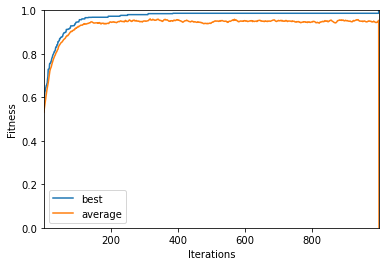

In [157]:
#Main
if __name__ == "__main__":
    
    #Parameters needed for the main
    best=0.0
    average=0.0
    iteration=0
    
    #Array to hold best and average fitness per iteration
    bestM = np.empty([iteration_max],dtype=np.float32)
    averageM = np.empty([iteration_max],dtype=np.float32)
    
    print("=== GENETIC ALGORITHM APPLIED TO OVERLAY NETWORK OPTIMIZATION ===")
    
    #Initialize the best and average fitness at iteration 0 to 0 (graph starts from 0)
    bestM[iteration] = best
    averageM[iteration] = average
    
    #The loop with a termination criterion of maximum number of uterations
    while (iteration<iteration_max-1):
        
        #An empty array for saving the new generation at the end of each iteration
        #the array should be empty
        new_population = np.empty((0,len(chromosome_string)))
        
        for j in range(int(popSize/2)): #We will have the popSize (100) by getting two mutants at the end of every loop
            
            #Get the two parents from the Tournament selection method
            selected_parents = select_parents_ts(chromosome)
            parent_a = selected_parents[0]
            parent_b = selected_parents[1]
            
            #Get the two children from the crossover operation 
            selected_children = crossover(parent_a, parent_b, crossover_rate)
            child_a = selected_children[0]
            child_b = selected_children[1]
            
            #Get the two mutatnts from the mutation operation
            mutated_children = mutation(child_a, child_b, mutation_rate)
            mutated_a = mutated_children[0]
            mutated_b = mutated_children[1]
            
            #Add the new nutants into the new population stack till the new population is the same size as the chromosome
            #the initial population
            new_population = np.vstack((new_population, mutated_a, mutated_b))
            
        #Replace initial population (chromosome) with the new population
        chromosome = new_population
        
        #Get the best and average fitness of the new population per iteration
        best_average = evaluateFitness(chromosome,best)
        best = best_average[0]
        
        #Get the average fitness of the new population 
        average = best_average[1]
        
        #Add the best and average per each iteration to their respective array
        bestM[iteration] = best
        averageM[iteration] = average
        
        print("Just completed iteration ",  iteration) #for progress tracking
        #Increment the iteration
        iteration += 1
    
    #Print the headings and the respective values of the best and average fitness
    print("Best fitness: ", best)
    print("Average fitness: ", average)
    
    
    print ("Performance Graph for maximum iteration of ", iteration_max)
        
    #Performance graph
    plotChart(bestM,averageM)